# **S1 - Project**

> **▶최종 목적: 다음 분기에 어떤 게임을 설계해야 할까 ?**

*  플랫폼 ?
*  장르 ?


> **▶알아봐야 할 것:**



1.   **지역에 따라서 선호하는 게임 장르가 다를까**<br>
2.   **연도별 게임의 트렌드가 있을까**<br>
3.   **출고량이 높은 게임에 대한 분석 및 시각화 프로세스**<br>


# **1. 데이터 불러오기**



`Name` : 게임의 이름<br>
`Platform` : 게임이 지원되는 플랫폼의 이름<br>
`Year` : 게임이 출시된 연도<br>
`Genre` : 게임의 장르<br>
`Publisher` : 게임을 제작한 회사<br>
`NA_Sales` : 북미지역에서의 출고량<br>
`EU_Sales` : 유럽지역에서의 출고량<br>
`JP_Sales` : 일본지역에서의 출고량<br>
`Other_Sales` : 기타지역에서의 출고량

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/drive/My Drive/project1/vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


# **2. 데이터 확인 및 전처리**



**2-1) 결측치 제거**

In [5]:
# 'Unnamed: 0' 인 column 제거
df=df.drop(df.columns[0], axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
df.shape

(16598, 9)

In [7]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [9]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64



---



**2-2) 데이터 형변환**

In [10]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [11]:
l1=[]
for a in df['Other_Sales']:
  if 'K' in a:
    l1.append(a)
len(l1)

97

In [12]:
# K=1000 / M=1,000,000 / B=1,000,000,000

def toint(string):
  if "M" in string:
    return float(string.replace('M',''))
  elif "K" in string:
    return float(string.replace('K',''))*0.001
  else:
    return float(string)

df['NA_Sales']=df['NA_Sales'].apply(toint)
df['EU_Sales']=df['EU_Sales'].apply(toint)
df['JP_Sales']=df['JP_Sales'].apply(toint)
df['Other_Sales']=df['Other_Sales'].apply(toint)

In [13]:
def toint2(x):
  return int(x)

df['Year']=df['Year'].apply(toint2)

In [14]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [15]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03




---



**2-3) 이상치 제거 (YEAR)**

In [16]:
df.describe()

# 요약통계를 보니, Year에 최소값에 0 값이 있다. 확인 필요.

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,1994.178437,0.265195,0.147378,0.078283,0.048234
std,155.484265,0.822431,0.508340,0.309272,0.189678
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [17]:
year_uni=df['Year'].unique()
year_uni.sort()
year_uni

# Year에 상식적으로 게임이 출시된 연도로 볼 수 없는 100 이하 수치는 제거 필요.

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   86,   94,   95,   96,   97,
         98, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2020])

In [18]:
print('전체 row 갯수: ', len(df))
print('연도가 100 이하인 row 갯수: ', len(df[df['Year']<=100]))

df_rev1=df.drop(df[df['Year']<100].index)
df_rev1.reset_index(drop=True, inplace=True)
df_rev1

전체 row 갯수:  16241
연도가 100 이하인 row 갯수:  100


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16136,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16137,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16138,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16139,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


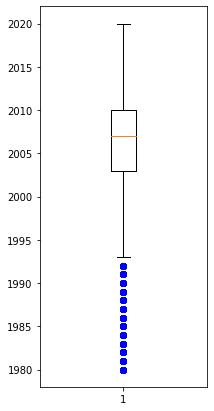

In [19]:
plt.figure(figsize=(3,7))
plt.boxplot(df_rev1['Year'], sym="bo");
plt.show()



---



**2-4) 데이터 둘러보기**

In [20]:
print(len(df_rev1['Year'].unique()))
print(len(df_rev1['Genre'].unique()))
print(len(df_rev1['Platform'].unique()))
print(len(df_rev1['Publisher'].unique()))
print(len(df_rev1['Name'].unique()))

39
12
31
573
11238


In [21]:
df_rev1['Genre'].value_counts()

Action          3226
Sports          2289
Misc            1671
Role-Playing    1457
Shooter         1268
Adventure       1264
Racing          1209
Platform         865
Simulation       841
Fighting         829
Strategy         664
Puzzle           558
Name: Genre, dtype: int64

In [22]:
# Total of 4 sale data 생성하여 총합 확인 필요.
df_rev1['Total']=df_rev1.iloc[:,5:9].sum(axis=1)
df_rev1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16136,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16137,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16138,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16139,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [23]:
df_rev1.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
count,16141.000000,16141.000000,16141.000000,16141.000000,16141.000000,16141.000000
mean,2006.406356,0.265156,0.147319,0.077951,0.048224,0.538650
std,5.830780,0.822621,0.508480,0.306771,0.189939,1.562156
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# **3. 분석**

###**3-1) 어느지역에서 가장 많이 출고되었을까?**

Result: 북미<br>

*   지역별 출고량 합계를 비교한 결과, 북미 지역에서 가장 높을 출고량을 나타남
*   265,156 (0.265156 Million)





In [24]:
# 지역별 합계

region_sum=df_rev1[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total']].sum()   # 시리즈 (데이터프레임에서 하나의 열만 가져온다면, 그건 시리즈가 된다.)
region_sum=pd.DataFrame(region_sum, columns=['Sales Sum']) # 시리즈 -> 데이터프레임으로 변환
region_sum=region_sum.reset_index().sort_values(by='Sales Sum', ascending=False)
region_sum.rename(columns={'index':'Region'}, inplace=True)

print(df_rev1['NA_Sales'].sum())

region_sum

4279.88


,Region,Sales Sum
4,Total,8694.35
0,NA_Sales,4279.88
1,EU_Sales,2377.87
2,JP_Sales,1258.21
3,Other_Sales,778.39


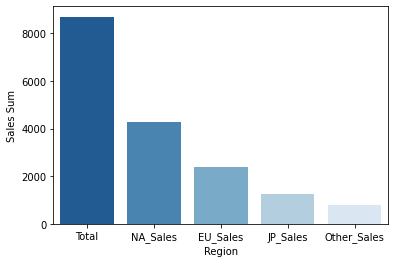

In [25]:
sns.barplot(data=region_sum, x=region_sum['Region'], y=region_sum['Sales Sum'], palette="Blues_r");

### **3-2) 어느 장르의 게임이 가장 많이 출고 되었을까?**

In [243]:
# 각 지역
genre_NA=df_rev1.groupby('Genre').NA_Sales.sum()
genre_NA1=pd.DataFrame(genre_NA, columns=['NA_Sales'])
genre_NA1_sort=genre_NA1.reset_index().sort_values(by='NA_Sales', ascending=False)

genre_EU=df_rev1.groupby('Genre').EU_Sales.sum()
genre_EU1=pd.DataFrame(genre_EU, columns=['EU_Sales'])
genre_EU1_sort=genre_EU1.reset_index().sort_values(by='EU_Sales', ascending=False)

genre_JP=df_rev1.groupby('Genre').sum()['JP_Sales']
genre_JP1=pd.DataFrame(genre_JP, columns=['JP_Sales'])
genre_JP1_sort=genre_JP1.reset_index().sort_values(by='JP_Sales', ascending=False)

genre_Other=df_rev1.groupby('Genre').sum()['Other_Sales']
genre_Other1=pd.DataFrame(genre_Other, columns=['Other_Sales'])
genre_Other1_sort=genre_Other1.reset_index().sort_values(by='Other_Sales', ascending=False)

# 전체 지역
genre_region=df_rev1.groupby('Genre').sum().drop(['Year'],axis=1)
genre_region_sort=genre_region.reset_index().sort_values(by='Total', ascending=False)  # sort 내림차순은 , ascending=False 파라미터 사용

genre_region1=df_rev1.groupby('Genre').Total.sum()
genre_region_df=pd.DataFrame(genre_region1)
genre_region_df=genre_region_df.reset_index().sort_values(by='Total', ascending=False)
genre_region_df.head(7)

,Genre,Total
0,Action,1707.85
10,Sports,1300.33
8,Shooter,1016.31
7,Role-Playing,874.35
4,Platform,822.23
3,Misc,778.22
6,Racing,719.42


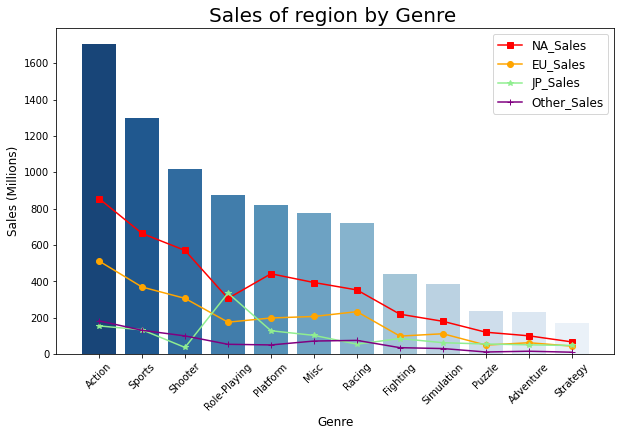

In [300]:
plt.figure(figsize=(10, 6))

sns.barplot(data=genre_region_sort, x=genre_region_sort['Genre'], y=genre_region_sort['Total'], palette="Blues_r");
plt.plot(genre_region_sort['Genre'], genre_region_sort['NA_Sales'], marker='s', color='red', label='NA_Sales')
plt.plot(genre_region_sort['Genre'], genre_region_sort['EU_Sales'], marker='o', color='orange', label='EU_Sales')
plt.plot(genre_region_sort['Genre'], genre_region_sort['JP_Sales'], marker='*', color='lightgreen', label='JP_Sales')
plt.plot(genre_region_sort['Genre'], genre_region_sort['Other_Sales'], marker='+', color='purple', label='Other_Sales')

plt.title('Sales of region by Genre ', fontsize=20) 
plt.ylabel('Sales (Millions)', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12, loc='best')
plt.show();

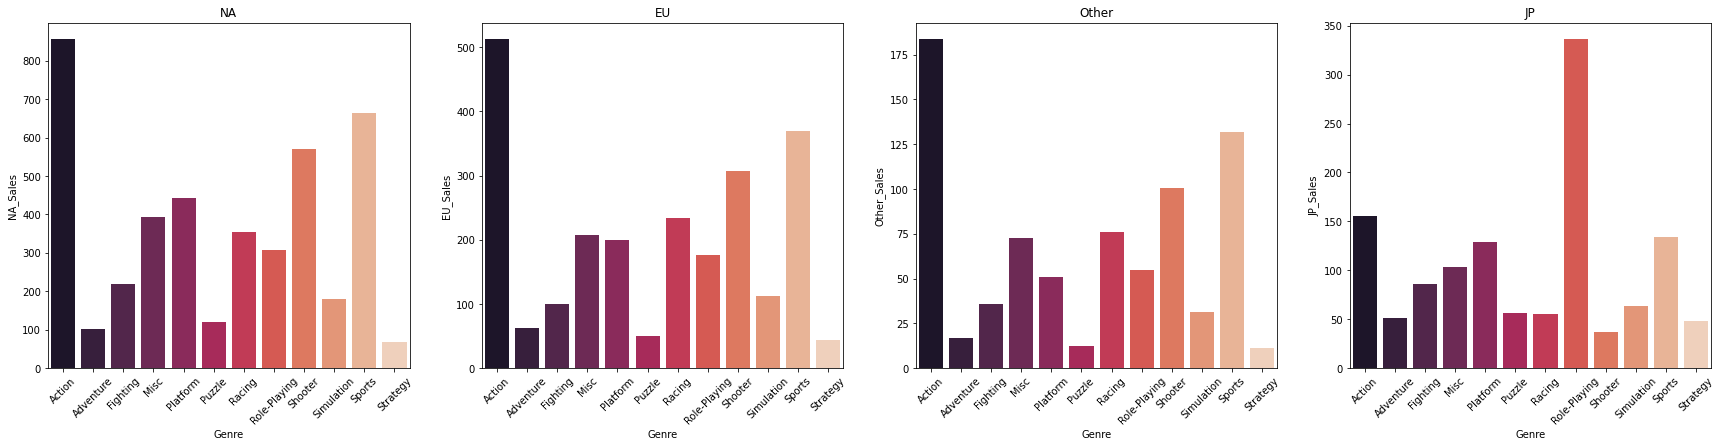

In [30]:
fig=plt.figure(figsize=(28,6))
ax1=fig.add_subplot(1,4,1)
ax2=fig.add_subplot(1,4,2)
ax3=fig.add_subplot(1,4,3)
ax4=fig.add_subplot(1,4,4)

#ax1.plot(genre_NA_sort['Genre'], genre_NA_sort['NA_Sales'], marker='s', color='red', label='NA_Sales');
sns.barplot(data=genre_NA1, x=genre_NA1.index, y='NA_Sales', palette="rocket", ax=ax1)
#ax2.plot(genre_EU_sort['Genre'], genre_EU_sort['EU_Sales'], marker='o', color='orange', label='EU_Sales');
sns.barplot(data=genre_EU1, x=genre_EU1.index, y='EU_Sales', palette="rocket", ax=ax2)
#ax3.plot(genre_JP_sort['Genre'], genre_JP_sort['JP_Sales'], marker='*', color='lightgreen', label='JP_Sales')
sns.barplot(data=genre_JP1, x=genre_JP1.index, y='JP_Sales', palette="rocket", ax=ax4)
#ax4.plot(genre_Other_sort['Genre'], genre_Other_sort['Other_Sales'], marker='+', color='purple', label='Other_Sales')
sns.barplot(data=genre_Other1, x=genre_Other1.index, y='Other_Sales', palette="rocket", ax=ax3)

ax1.set(title='NA')
ax2.set(title='EU')
ax3.set(title='Other')
ax4.set(title='JP')

ax1.set_xticks(np.arange(0, 12, step=1))
ax2.set_xticks(np.arange(0, 12, step=1))
ax3.set_xticks(np.arange(0, 12, step=1))
ax4.set_xticks(np.arange(0, 12, step=1))

zzz=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
ax1.set_xticklabels(zzz,rotation=45)
ax2.set_xticklabels(zzz,rotation=45)
ax3.set_xticklabels(zzz,rotation=45)
ax4.set_xticklabels(zzz,rotation=45)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.95, top=0.9, wspace=0.2, hspace=0.5)
plt.show();

### **3-3) 어느 게임이 가장 많이 출고 되었을까?**


In [31]:
print(len(df_rev1['Name'].unique()))

11238


In [377]:
# game에 대한 total sales 합계
game_region=df_rev1.groupby('Name').sum().drop(['Year'],axis=1)
game_region=game_region.sort_values(by='Total', ascending=False)
game_region.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
Name,,,,,
Wii Sports,41.49,29.02,3.77,8.46,82.74
Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92
Super Mario Bros.,32.48,4.88,6.96,0.99,45.31
Tetris,26.17,2.95,6.03,0.69,35.84
Mario Kart Wii,15.85,12.88,3.79,3.31,35.83
Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.38
Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.84
New Super Mario Bros.,11.38,9.23,6.50,2.90,30.01


In [79]:
df_top=df_rev1[df_rev1['Name'].isin(['Wii Sports','Grand Theft Auto V','Super Mario Bros.','Tetris','Mario Kart Wii','Wii Sports Resort','Pokemon Red/Pokemon Blue','Call of Duty: Modern Warfare 3','New Super Mario Bros.','Call of Duty: Black Ops II'])]
df_top

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
1180,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
1962,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
2741,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
2838,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3268,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3394,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
4088,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4127,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
4855,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,0.60,0.21,0.00,0.08,0.89
6218,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74


In [90]:
df_top_genre=df_top.groupby(['Genre']).sum()['Total']
df_top_genre1=pd.DataFrame(df_top_genre, columns=['Total'])
df_top_genre1=df_top_genre1.reset_index().sort_values(by='Total', ascending=False)

df_top_gen=df_top.groupby(['Genre','Name']).sum()['Total']
df_top_gen1=pd.DataFrame(df_top_gen, columns=['Total'])
#game_gen1=game_gen1.reset_index()

df_top_genre1

,Genre,Total
6,Sports,115.74
1,Platform,75.32
5,Shooter,60.57
0,Action,55.92
2,Puzzle,35.84
3,Racing,35.83
4,Role-Playing,31.38


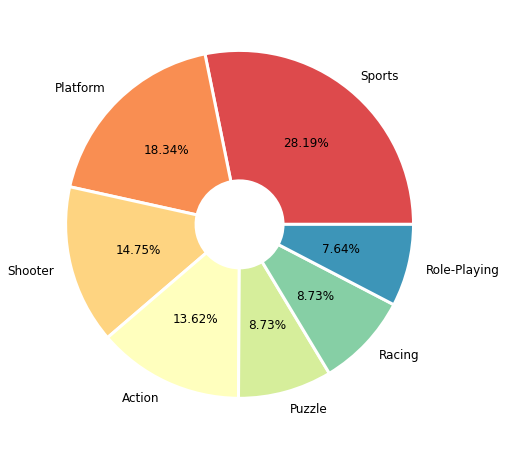

In [118]:
fig=plt.figure(figsize=(8,8))
fig.set_facecolor('white')

ax=fig.add_subplot()
colors=sns.color_palette('Spectral', 7)
wedgeprops={'width': 0.75, 'edgecolor': 'w', 'linewidth': 3}

ax.pie(x=df_top_genre1['Total'],labels=df_top_genre1['Genre'], colors=colors, textprops={'fontsize': 12}, wedgeprops=wedgeprops, autopct=lambda p : '{:.2f}%'.format(p)) ## 파이 차트 출력
plt.show()

In [378]:
df_top_platform=df_top.groupby(['Platform']).sum()['Total']
df_top_platform1=pd.DataFrame(df_top_platform, columns=['Total'])
df_top_platform1=df_top_platform1.reset_index().sort_values(by='Total', ascending=False)

df_top_plat=df_top.groupby(['Platform','Name']).sum()['Total']
df_top_plat1=pd.DataFrame(df_top_plat, columns=['Total'])

df_top_platform1

,Platform,Total
6,Wii,152.46
1,GB,66.71
4,PS3,48.90
2,NES,45.82
8,X360,44.88
0,DS,30.01
5,PS4,11.99
9,XOne,5.08
3,PC,4.33
7,WiiU,0.42


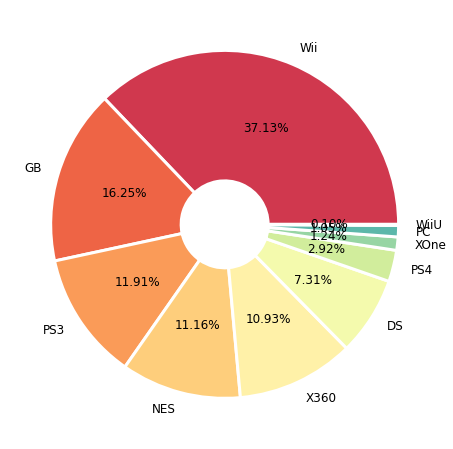

In [123]:
fig=plt.figure(figsize=(8,8))
fig.set_facecolor('white')

ax=fig.add_subplot()
colors=sns.color_palette('Spectral', 10)
wedgeprops={'width': 0.75, 'edgecolor': 'w', 'linewidth': 3}

ax.pie(x=df_top_platform1['Total'],labels=df_top_platform1['Platform'], colors=colors, textprops={'fontsize': 12}, wedgeprops=wedgeprops, autopct=lambda p : '{:.2f}%'.format(p)) ## 파이 차트 출력
plt.show()

In [379]:
df_top_publisher=df_top.groupby(['Publisher']).sum()['Total']
df_top_publisher1=pd.DataFrame(df_top_publisher, columns=['Total'])
df_top_publisher1=df_top_publisher1.reset_index().sort_values(by='Total', ascending=False)

df_top_pub=df_top.groupby(['Publisher','Name']).sum()['Total']
df_top_pub1=pd.DataFrame(df_top_pub, columns=['Total'])

df_top_publisher1

,Publisher,Total
1,Nintendo,294.11
0,Activision,60.57
2,Take-Two Interactive,55.92


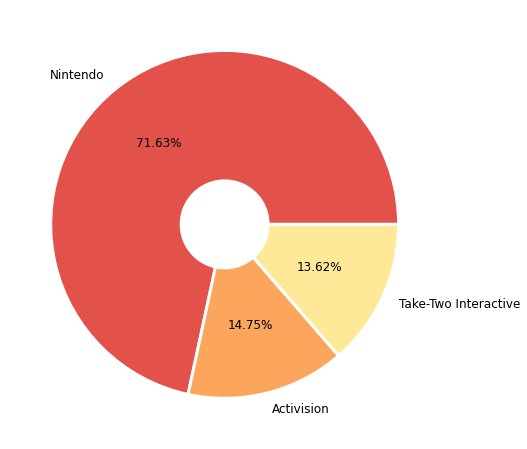

In [380]:
fig=plt.figure(figsize=(8,8))
fig.set_facecolor('white')

ax=fig.add_subplot()
colors=sns.color_palette('Spectral')
wedgeprops={'width': 0.75, 'edgecolor': 'w', 'linewidth': 3}

ax.pie(x=df_top_publisher1['Total'],labels=df_top_publisher1['Publisher'], colors=colors, textprops={'fontsize': 12}, wedgeprops=wedgeprops, autopct=lambda p : '{:.2f}%'.format(p)) ## 파이 차트 출력
plt.show()

In [381]:
df_top_year=df_top.groupby(['Year']).sum()['Total']
df_top_year1=pd.DataFrame(df_top_year, columns=['Total'])
df_top_year1_sort=df_top_year1.reset_index().sort_values(by='Total', ascending=False)

df_top_y=df_top.groupby(['Year','Name']).sum()['Total']
df_top_y1=pd.DataFrame(df_top_y, columns=['Total'])

df_top_y1

Total
Year Name                                 
1985 Super Mario Bros.               40.24
1988 Tetris                           5.58
1989 Tetris                          30.26
1996 Pokemon Red/Pokemon Blue        31.38
1999 Super Mario Bros.                5.07
2006 New Super Mario Bros.           30.01
     Wii Sports                      82.74
2008 Mario Kart Wii                  35.83
2009 Wii Sports Resort               33.00
2011 Call of Duty: Modern Warfare 3  30.84
2012 Call of Duty: Black Ops II      29.73
2013 Grand Theft Auto V              37.77
2014 Grand Theft Auto V              17.07
2015 Grand Theft Auto V               1.08

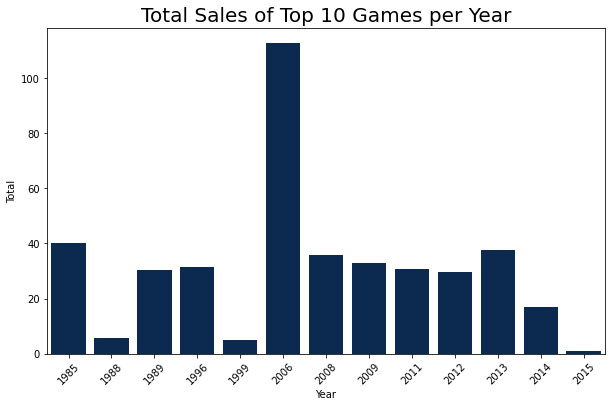

In [382]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_year1, x=df_top_year1.index, y=df_top_year1['Total'], color='#01285B');

plt.title('Total Sales of Top 10 Games per Year', fontsize=20);
plt.xticks(rotation=45)
plt.show();

### **#1 by 지역**

In [38]:
# 각 지역
game_NA=df_rev1.groupby('Name').NA_Sales.sum()
game_NA1=pd.DataFrame(game_NA, columns=['NA_Sales'])
game_NA1_sort=game_NA1.reset_index().sort_values(by='NA_Sales', ascending=False)
game_NA5=game_NA1_sort.head(5)
game_NA10=game_NA1_sort.head(10)

game_EU=df_rev1.groupby('Name').EU_Sales.sum()
game_EU1=pd.DataFrame(game_EU, columns=['EU_Sales'])
game_EU1_sort=game_EU1.reset_index().sort_values(by='EU_Sales', ascending=False)
game_EU5=game_EU1_sort.head(5)
game_EU10=game_EU1_sort.head(10)

game_JP=df_rev1.groupby('Name').sum()['JP_Sales']
game_JP1=pd.DataFrame(game_JP, columns=['JP_Sales'])
game_JP1_sort=game_JP1.reset_index().sort_values(by='JP_Sales', ascending=False)
game_JP5=game_JP1_sort.head(5)
game_JP10=game_JP1_sort.head(10)

game_Other=df_rev1.groupby('Name').sum()['Other_Sales']
game_Other1=pd.DataFrame(game_Other, columns=['Other_Sales'])
game_Other1_sort=game_Other1.reset_index().sort_values(by='Other_Sales', ascending=False)
game_Other5=game_Other1_sort.head(5)
game_Other10=game_Other1_sort.head(10)

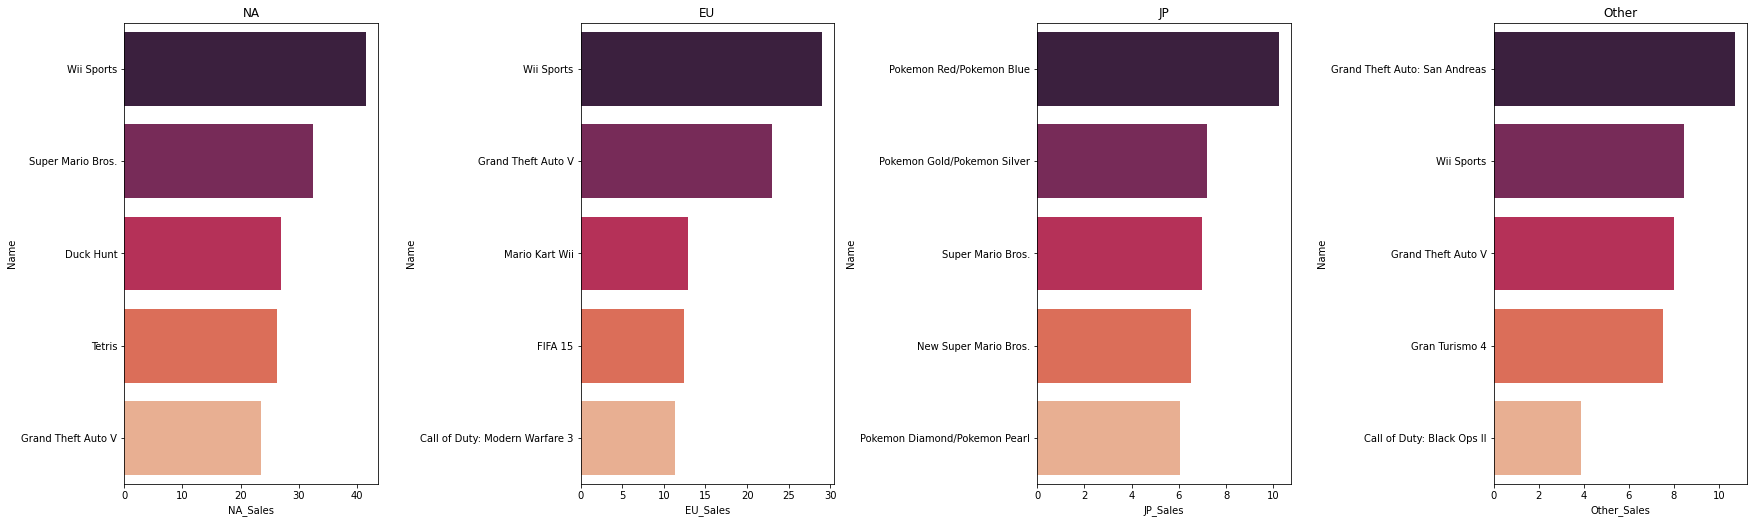

In [39]:
# TOP 5 시각화

fig=plt.figure(figsize=(28,8))
ax1=fig.add_subplot(1,4,1)
ax2=fig.add_subplot(1,4,2)
ax3=fig.add_subplot(1,4,3)
ax4=fig.add_subplot(1,4,4)

sns.barplot(data=game_NA5, y='Name', x='NA_Sales', palette="rocket", ax=ax1, orient='h')
sns.barplot(data=game_EU5, y='Name', x='EU_Sales', palette="rocket", ax=ax2, orient='h')
sns.barplot(data=game_JP5, y='Name', x='JP_Sales', palette="rocket", ax=ax3, orient='h')
sns.barplot(data=game_Other5, y='Name', x='Other_Sales', palette="rocket", ax=ax4, orient='h')

ax1.set(title='NA')
ax2.set(title='EU')
ax3.set(title='JP')
ax4.set(title='Other')

#ax1.set_xticks(np.arange(0, 11, step=1))
#ax2.set_xticks(np.arange(0, 11, step=1))
#ax3.set_xticks(np.arange(0, 11, step=1))
#ax4.set_xticks(np.arange(0, 11, step=1))

#zzz=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
#ax1.set_xticklabels(zzz,rotation=45)
#ax2.set_xticklabels(zzz,rotation=45)
#ax3.set_xticklabels(zzz,rotation=45)
#ax4.set_xticklabels(zzz,rotation=45)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.93, top=0.9, wspace=0.8, hspace=0.4)
plt.show();

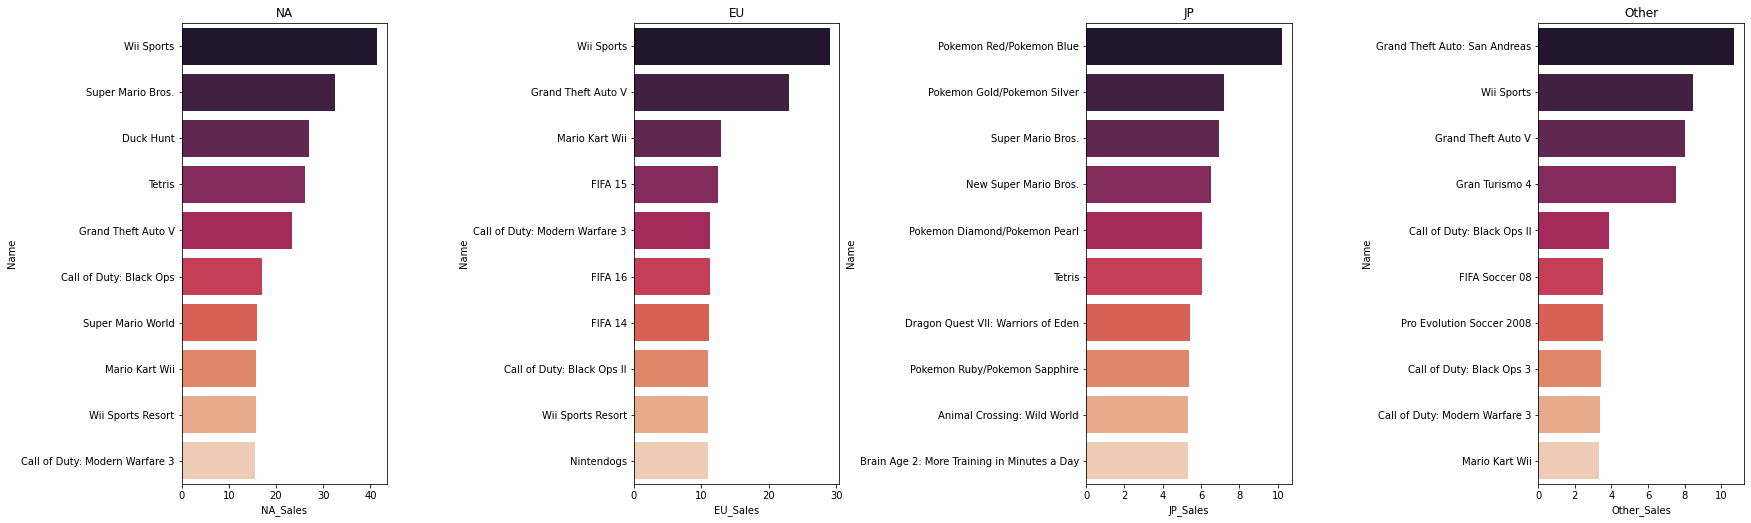

In [40]:
# TOP 10 시각화

fig=plt.figure(figsize=(28,8))
ax1=fig.add_subplot(1,4,1)
ax2=fig.add_subplot(1,4,2)
ax3=fig.add_subplot(1,4,3)
ax4=fig.add_subplot(1,4,4)

sns.barplot(data=game_NA10, y='Name', x='NA_Sales', palette="rocket", ax=ax1, orient='h')
sns.barplot(data=game_EU10, y='Name', x='EU_Sales', palette="rocket", ax=ax2, orient='h')
sns.barplot(data=game_JP10, y='Name', x='JP_Sales', palette="rocket", ax=ax3, orient='h')
sns.barplot(data=game_Other10, y='Name', x='Other_Sales', palette="rocket", ax=ax4, orient='h')

ax1.set(title='NA')
ax2.set(title='EU')
ax3.set(title='JP')
ax4.set(title='Other')

#ax1.set_xticks(np.arange(0, 11, step=1))
#ax2.set_xticks(np.arange(0, 11, step=1))
#ax3.set_xticks(np.arange(0, 11, step=1))
#ax4.set_xticks(np.arange(0, 11, step=1))

#zzz=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
#ax1.set_xticklabels(zzz,rotation=45)
#ax2.set_xticklabels(zzz,rotation=45)
#ax3.set_xticklabels(zzz,rotation=45)
#ax4.set_xticklabels(zzz,rotation=45)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=1.2, hspace=0.4)
plt.show();

### **#2 by 장르**

In [41]:
genre_uni=df['Genre'].unique()
print(genre_uni)
print(len(genre_uni))

['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']
12


In [42]:
df_rev1[df_rev1['Genre'].isin(['Action'])]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08
15,Mini Ninjas,PS3,2009,Action,Eidos Interactive,0.14,0.16,0.00,0.06,0.36
...,...,...,...,...,...,...,...,...,...,...
16119,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08
16125,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.27
16127,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,0.91,0.39,0.00,0.13,1.43
16137,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01


In [43]:
game_gen=df_rev1.groupby(['Genre','Name']).sum()['Total']
game_gen1=pd.DataFrame(game_gen, columns=['Total'])
game_gen1=game_gen1.reset_index()

# 'Action'
game_gen1_ac=game_gen1[game_gen1['Genre'].isin(['Action'])]
game_gen1_ac=game_gen1_ac.sort_values(by='Total', ascending=False)
game_ac=game_gen1_ac.head(5)

# 'Adventure'
game_gen1_ad=game_gen1[game_gen1['Genre'].isin(['Adventure'])]
game_gen1_ad=game_gen1_ad.sort_values(by='Total', ascending=False)
game_ad=game_gen1_ad.head(5)

# 'Misc'
game_gen1_mi=game_gen1[game_gen1['Genre'].isin(['Misc'])]
game_gen1_mi=game_gen1_mi.sort_values(by='Total', ascending=False)
game_mi=game_gen1_mi.head(5)

# 'Platform'
game_gen1_pl=game_gen1[game_gen1['Genre'].isin(['Platform'])]
game_gen1_pl=game_gen1_pl.sort_values(by='Total', ascending=False)
game_pl=game_gen1_pl.head(5)

# 'Sports'
game_gen1_sp=game_gen1[game_gen1['Genre'].isin(['Sports'])]
game_gen1_sp=game_gen1_sp.sort_values(by='Total', ascending=False)
game_sp=game_gen1_sp.head(5)

# 'Simulation'
game_gen1_si=game_gen1[game_gen1['Genre'].isin(['Simulation'])]
game_gen1_si=game_gen1_si.sort_values(by='Total', ascending=False)
game_si=game_gen1_si.head(5)

# 'Racing'
game_gen1_ra=game_gen1[game_gen1['Genre'].isin(['Racing'])]
game_gen1_ra=game_gen1_ra.sort_values(by='Total', ascending=False)
game_ra=game_gen1_ra.head(5)

# 'Role-Playing'
game_gen1_ro=game_gen1[game_gen1['Genre'].isin(['Role-Playing'])]
game_gen1_ro=game_gen1_ro.sort_values(by='Total', ascending=False)
game_ro=game_gen1_ro.head(5)

# 'Puzzle'
game_gen1_pu=game_gen1[game_gen1['Genre'].isin(['Puzzle'])]
game_gen1_pu=game_gen1_pu.sort_values(by='Total', ascending=False)
game_pu=game_gen1_pu.head(5)

# 'Strategy'
game_gen1_st=game_gen1[game_gen1['Genre'].isin(['Strategy'])]
game_gen1_st=game_gen1_st.sort_values(by='Total', ascending=False)
game_st=game_gen1_st.head(5)

# 'Fighting'
game_gen1_fi=game_gen1[game_gen1['Genre'].isin(['Fighting'])]
game_gen1_fi=game_gen1_fi.sort_values(by='Total', ascending=False)
game_fi=game_gen1_fi.head(5)

# 'Shooter'
game_gen1_sh=game_gen1[game_gen1['Genre'].isin(['Shooter'])]
game_gen1_sh=game_gen1_sh.sort_values(by='Total', ascending=False)
game_sh=game_gen1_sh.head(5)
game_sh

#game_gen10=game_Other1_sort.head(10)

,Genre,Name,Total
7915,Shooter,Call of Duty: Modern Warfare 3,30.84
7911,Shooter,Call of Duty: Black Ops II,29.73
7909,Shooter,Call of Duty: Black Ops,29.41
8029,Shooter,Duck Hunt,28.31
7913,Shooter,Call of Duty: Ghosts,27.37


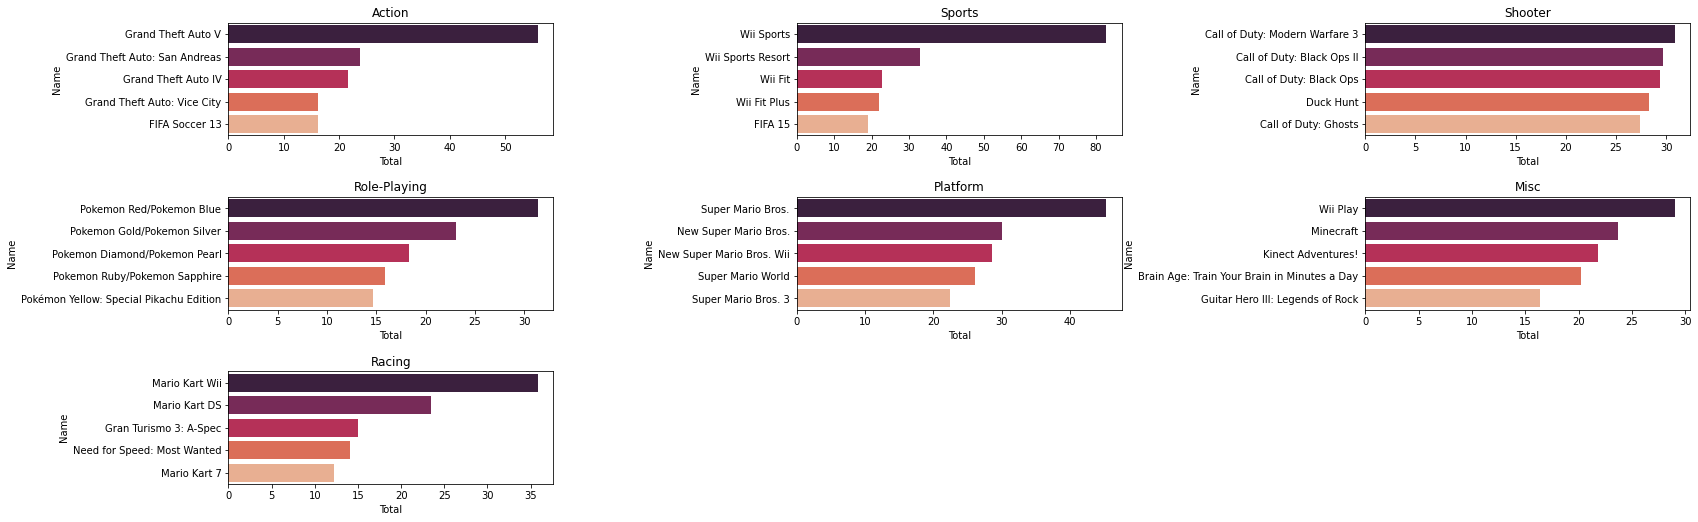

In [255]:
fig=plt.figure(figsize=(28,8))
ax1=fig.add_subplot(3,3,1)
ax2=fig.add_subplot(3,3,2)
ax3=fig.add_subplot(3,3,3)
ax4=fig.add_subplot(3,3,4)
ax5=fig.add_subplot(3,3,5)
ax6=fig.add_subplot(3,3,6)
ax7=fig.add_subplot(3,3,7)

sns.barplot(data=game_ac, y=game_ac['Name'], x='Total', palette="rocket", ax=ax1, orient='h')   # Action 1위
sns.barplot(data=game_sp, y=game_sp['Name'], x='Total', palette="rocket", ax=ax2, orient='h')   # Sports 2위
sns.barplot(data=game_sh, y=game_sh['Name'], x='Total', palette="rocket", ax=ax3, orient='h')   # Shooter 3위
sns.barplot(data=game_ro, y=game_ro['Name'], x='Total', palette="rocket", ax=ax4, orient='h')   # Role-Playing 4위
sns.barplot(data=game_pl, y=game_pl['Name'], x='Total', palette="rocket", ax=ax5, orient='h')   # Platform 5위
sns.barplot(data=game_mi, y=game_mi['Name'], x='Total', palette="rocket", ax=ax6, orient='h')   # Misc 6위
sns.barplot(data=game_ra, y=game_ra['Name'], x='Total', palette="rocket", ax=ax7, orient='h')   # Racing 7위

ax1.set(title='Action')
ax2.set(title='Sports')
ax3.set(title='Shooter')
ax4.set(title='Role-Playing')
ax5.set(title='Platform')
ax6.set(title='Misc')
ax7.set(title='Racing')

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.85, top=0.9, wspace=0.75, hspace=0.55)
plt.show();

### **#3 by 플랫폼**

In [55]:
plat_uni=df['Platform'].unique()
print(plat_uni)
print(len(plat_uni))

['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
31


In [60]:
game_plat=df_rev1.groupby(['Platform','Name']).sum()['Total']
game_plat1=pd.DataFrame(game_plat, columns=['Total'])
game_plat1=game_plat1.reset_index()
game_plat1

# 'PS2'
game_plat1_ps2=game_plat1[game_plat1['Platform'].isin(['PS2'])]
game_plat1_ps2=game_plat1_ps2.sort_values(by='Total', ascending=False)
game_ps2=game_plat1_ps2.head(5)

# 'X360'
game_plat1_x360=game_plat1[game_plat1['Platform'].isin(['X360'])]
game_plat1_x360=game_plat1_x360.sort_values(by='Total', ascending=False)
game_x360=game_plat1_x360.head(5)

# 'PS3'
game_plat1_ps3=game_plat1[game_plat1['Platform'].isin(['PS3'])]
game_plat1_ps3=game_plat1_ps3.sort_values(by='Total', ascending=False)
game_ps3=game_plat1_ps3.head(5)

# 'Wii'
game_plat1_wii=game_plat1[game_plat1['Platform'].isin(['Wii'])]
game_plat1_wii=game_plat1_wii.sort_values(by='Total', ascending=False)
game_wii=game_plat1_wii.head(5)

# 'DS'
game_plat1_ds=game_plat1[game_plat1['Platform'].isin(['DS'])]
game_plat1_ds=game_plat1_ds.sort_values(by='Total', ascending=False)
game_ds=game_plat1_ds.head(5)

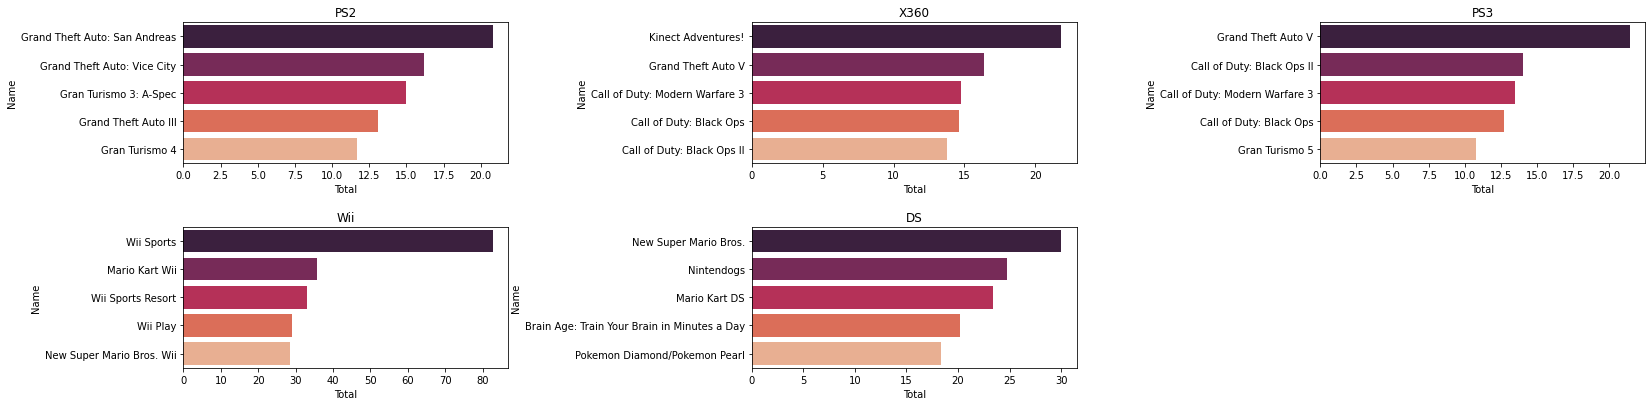

In [67]:
fig=plt.figure(figsize=(28,6))
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)

sns.barplot(data=game_ps2, y=game_ps2['Name'], x='Total', palette="rocket", ax=ax1, orient='h')   # PS2 1위
sns.barplot(data=game_x360, y=game_x360['Name'], x='Total', palette="rocket", ax=ax2, orient='h')   # X360 2위
sns.barplot(data=game_ps3, y=game_ps3['Name'], x='Total', palette="rocket", ax=ax3, orient='h')   # PS3 3위
sns.barplot(data=game_wii, y=game_wii['Name'], x='Total', palette="rocket", ax=ax4, orient='h')   # Wii 4위
sns.barplot(data=game_ds, y=game_ds['Name'], x='Total', palette="rocket", ax=ax5, orient='h')   # DS 5위

ax1.set(title='PS2')
ax2.set(title='X360')
ax3.set(title='PS3')
ax4.set(title='Wii')
ax5.set(title='DS')


plt.subplots_adjust(left=0.125, bottom=0.1, right=0.85, top=0.9, wspace=0.75, hspace=0.45)
plt.show();

### **3-4) 어느 플랫폼에서 지원한 게임이 가장 많이 출고되었을까?**

In [259]:
# 각 지역
plat_NA=df_rev1.groupby('Platform').NA_Sales.sum()
plat_NA_df=pd.DataFrame(plat_NA)
plat_NA_sort=plat_NA.reset_index().sort_values(by='NA_Sales', ascending=False)
plat_NA10=plat_NA_sort.head(10)

plat_EU=df_rev1.groupby('Platform').EU_Sales.sum()
plat_EU_df=pd.DataFrame(plat_EU)
plat_EU_sort=plat_EU.reset_index().sort_values(by='EU_Sales', ascending=False)
plat_EU10=plat_EU_sort.head(10)

plat_JP=df_rev1.groupby('Platform').sum()['JP_Sales']
plat_JP_df=pd.DataFrame(plat_JP)
plat_JP_sort=plat_JP.reset_index().sort_values(by='JP_Sales', ascending=False)
plat_JP10=plat_JP_sort.head(10)

plat_Other=df_rev1.groupby('Platform').sum()['Other_Sales']
plat_Other_df=pd.DataFrame(plat_Other)
plat_Other_sort=plat_Other.reset_index().sort_values(by='Other_Sales', ascending=False)
plat_Other10=plat_Other_sort.head(10)

# 전체 지역
plat_region=df_rev1.groupby('Platform').sum().drop(['Year'],axis=1)
plat_region_sort=plat_region.reset_index().sort_values(by='Total', ascending=False) # sort 내림차순은 ascending=False 파라미터

plat_region1=df_rev1.groupby('Platform').Total.sum()
plat_region_df=pd.DataFrame(plat_region1)
plat_region_df=plat_region_df.reset_index().sort_values(by='Total', ascending=False)

plat_region10=plat_region_df.head(10)
plat_region6=plat_region_df.head(6)
plat_region10

,Platform,Total
16,PS2,1212.32
28,X360,957.71
17,PS3,945.25
26,Wii,899.30
4,DS,800.02
15,PS,723.48
6,GBA,304.54
19,PSP,287.16
18,PS4,269.15
5,GB,254.23


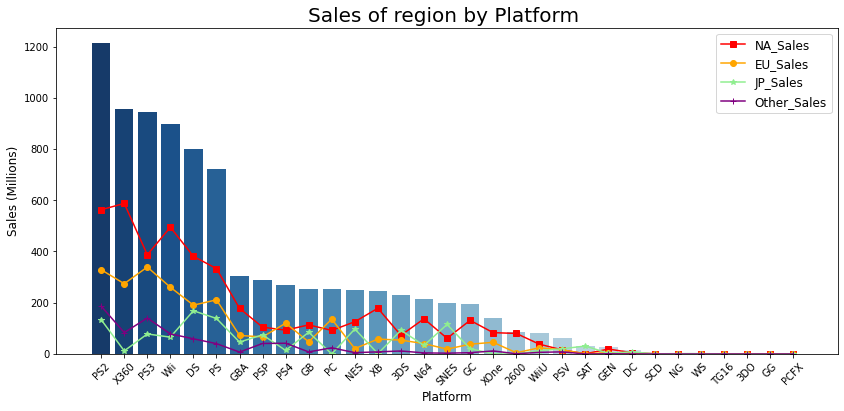

In [47]:
plt.figure(figsize=(14, 6))

sns.barplot(data=plat_region_sort, x=plat_region_sort['Platform'], y=plat_region_sort['Total'], palette="Blues_r");
plt.plot(plat_region_sort['Platform'], plat_region_sort['NA_Sales'], marker='s', color='red', label='NA_Sales')
plt.plot(plat_region_sort['Platform'], plat_region_sort['EU_Sales'], marker='o', color='orange', label='EU_Sales')
plt.plot(plat_region_sort['Platform'], plat_region_sort['JP_Sales'], marker='*', color='lightgreen', label='JP_Sales')
plt.plot(plat_region_sort['Platform'], plat_region_sort['Other_Sales'], marker='+', color='purple', label='Other_Sales')

plt.title('Sales of region by Platform ', fontsize=20) 
plt.ylabel('Sales (Millions)', fontsize=12)
plt.xlabel('Platform', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12, loc='best')
plt.show();

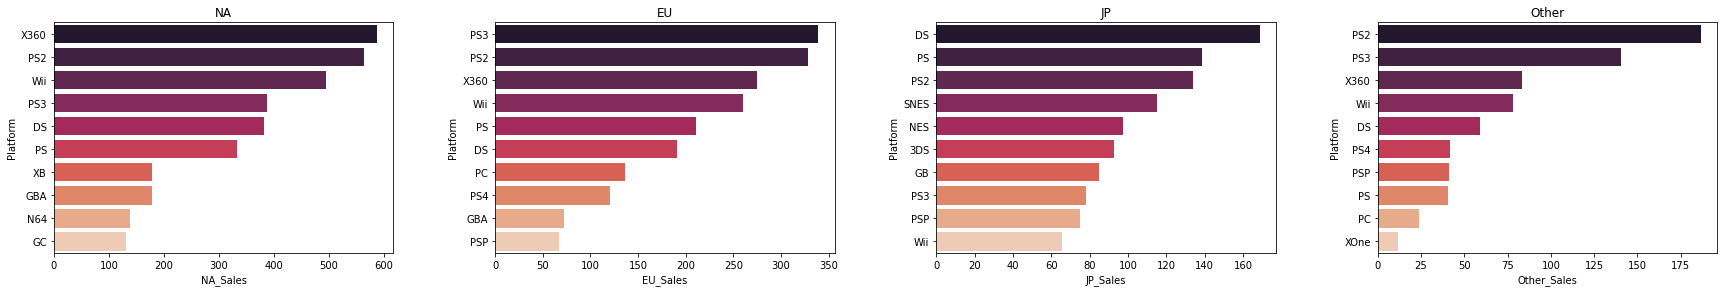

In [54]:
fig=plt.figure(figsize=(28,4))
ax1=fig.add_subplot(1,4,1)
ax2=fig.add_subplot(1,4,2)
ax3=fig.add_subplot(1,4,3)
ax4=fig.add_subplot(1,4,4)

sns.barplot(data=plat_NA10, y=plat_NA10['Platform'], x='NA_Sales', palette="rocket", ax=ax1, orient="h")
sns.barplot(data=plat_EU10, y=plat_EU10['Platform'], x='EU_Sales', palette="rocket", ax=ax2, orient="h")
sns.barplot(data=plat_JP10, y=plat_JP10['Platform'], x='JP_Sales', palette="rocket", ax=ax3, orient="h")
sns.barplot(data=plat_Other10, y=plat_Other10['Platform'], x='Other_Sales', palette="rocket", ax=ax4, orient="h")

ax1.set(title='NA')
ax2.set(title='EU')
ax3.set(title='JP')
ax4.set(title='Other')

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.95, top=0.9, wspace=0.3, hspace=0.5)
plt.show();

### **3-5) 어느 연도에 게임이 가장 많이 제작되었을까?**
### **3-6) 어느 연도에 제작된 게임들이 가장 많이 출고 되었을까?**



In [43]:
# 3-5. year의 단순 빈도수 (count=frequency)

year_count=df_rev1['Year'].value_counts()

year_count_df=pd.DataFrame(year_count)
year_count_df=year_count_df.reset_index()
year_count_df.rename(columns={'index':'Year', 'Year':'Count'}, inplace=True)
year_count_df=year_count_df.sort_values(by='Year')
year_count_df2=year_count_df.sort_values(by='Count', ascending=False)

year_count_df2.head(5)

,Year,Count
0,2009,1418
1,2008,1413
2,2010,1246
3,2007,1192
4,2011,1123


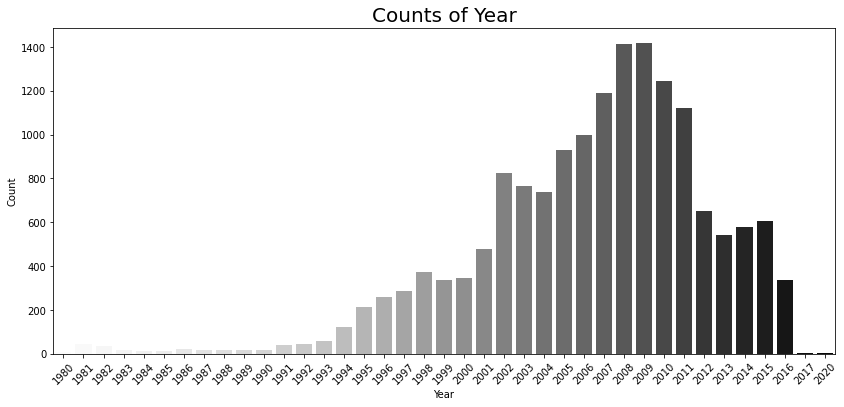

In [46]:
plt.figure(figsize=(14, 6))
sns.barplot(data=year_count_df, x=year_count_df['Year'], y=year_count_df['Count'], palette="Greys");

plt.title('Counts of Year', fontsize=20);
plt.xticks(rotation=45)
plt.show();

In [307]:
# 3-6. year에 대한 total sales
year_region=df_rev1.groupby('Year').sum()['Total']

year_region_df=pd.DataFrame(year_region)
year_region_df=year_region_df.reset_index()
year_region_df_sort=year_region_df.sort_values(by='Total', ascending=False)
year_region_df_sort.head(5)

,Year,Total
28,2008,674.24
29,2009,664.70
27,2007,608.15
30,2010,573.24
26,2006,510.57


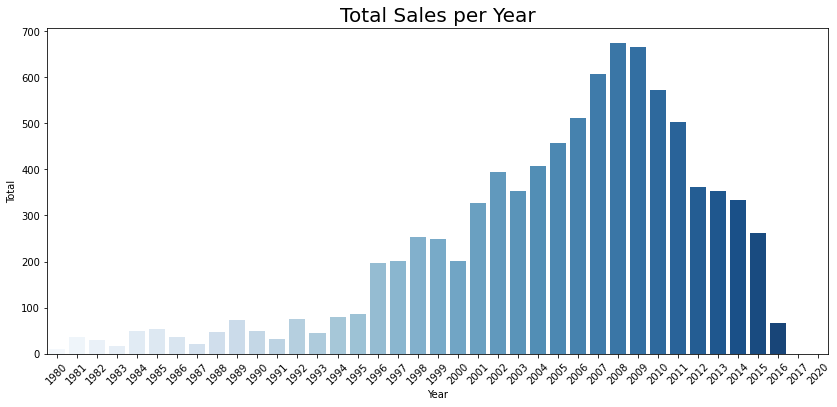

In [44]:
plt.figure(figsize=(14, 6))
sns.barplot(data=year_region, x=year_region.index, y=year_region['Total'], palette="Blues");

plt.title('Total Sales per Year', fontsize=20);
plt.xticks(rotation=45)
plt.show();

In [312]:
years = ["1980_1990", "1991_2000", "2001_2010", "2011_2020"]
year_region_df['Year_Cat']=pd.cut(year_region_df['Year'], labels=years, bins=4)

year_region_new=year_region_df.groupby('Year_Cat').sum().drop(['Year'],axis=1)
year_region_new

,Total
Year_Cat,
1980_1990,424.30
1991_2000,1421.94
2001_2010,4967.47
2011_2020,1880.64


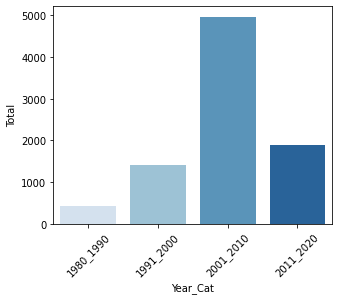

In [319]:
plt.figure(figsize=(5, 4))
sns.barplot(data=year_region_new, x=year_region_new.index, y=year_region_new['Total'], palette="Blues");

#plt.title('Total Sales per Year_cat', fontsize=20);
plt.xticks(rotation=45)
plt.show();

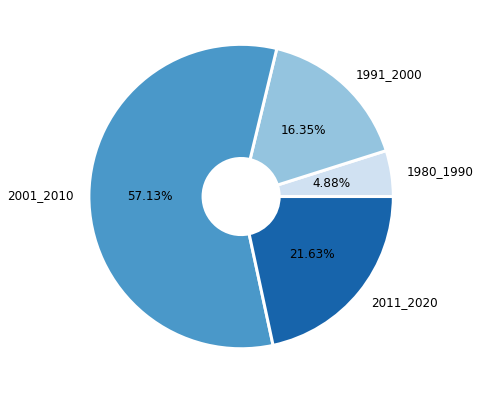

In [325]:
fig=plt.figure(figsize=(7,7))
fig.set_facecolor('white')

ax=fig.add_subplot()
colors=sns.color_palette('Blues', 4)
wedgeprops={'width': 0.75, 'edgecolor': 'w', 'linewidth': 3}

ax.pie(x=year_region_new['Total'],labels=year_region_new.index, colors=colors, textprops={'fontsize': 12}, wedgeprops=wedgeprops, autopct=lambda p : '{:.2f}%'.format(p)) ## 파이 차트 출력
plt.show()

### 3-7) 지역별 출고량 **per 연도**

In [178]:
# 각 지역
year_NA=df_rev1.groupby('Year').NA_Sales.sum()            #1
year_EU=df_rev1.groupby('Year').EU_Sales.sum()            #2 
year_JP=df_rev1.groupby('Year').sum()['JP_Sales']         #3
year_Other=df_rev1.groupby('Year').sum()['Other_Sales']   #4    => 1,2와 3,4는 같은 결과를 내는 약간 다른 groupby 사용 방법

# 전체 지역 sum
year_region=df_rev1.groupby('Year').sum()
year_region

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
Year,,,,,
1980,10.13,0.64,0.00,0.11,10.88
1981,33.40,1.96,0.00,0.32,35.68
1982,26.92,1.65,0.00,0.31,28.88
1983,7.76,0.80,8.10,0.14,16.80
1984,33.28,2.10,14.27,0.70,50.35
1985,33.73,4.74,14.56,0.92,53.95
1986,12.50,2.84,18.76,1.93,36.03
1987,8.46,1.41,11.63,0.20,21.70
1988,23.87,6.59,15.76,0.99,47.21


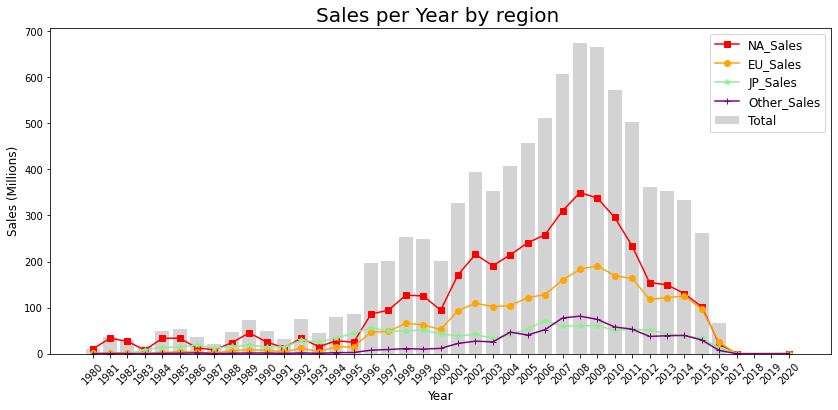

In [175]:
plt.figure(figsize=(14, 6))

plt.plot(year_region.index, year_region['NA_Sales'], marker='s', color='red', label='NA_Sales')
plt.plot(year_region.index, year_region['EU_Sales'], marker='o', color='orange', label='EU_Sales')
plt.plot(year_region.index, year_region['JP_Sales'], marker='*', color='lightgreen', label='JP_Sales')
plt.plot(year_region.index, year_region['Other_Sales'], marker='+', color='purple', label='Other_Sales')
plt.bar(year_region.index, year_region['Total'], color='lightgray', label='Total')


plt.title('Sales per Year by region ', fontsize=20)
plt.ylabel('Sales (Millions)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(np.arange(1980, 2021, step=1), rotation=45)
plt.legend(fontsize=12, loc='best')
plt.show();

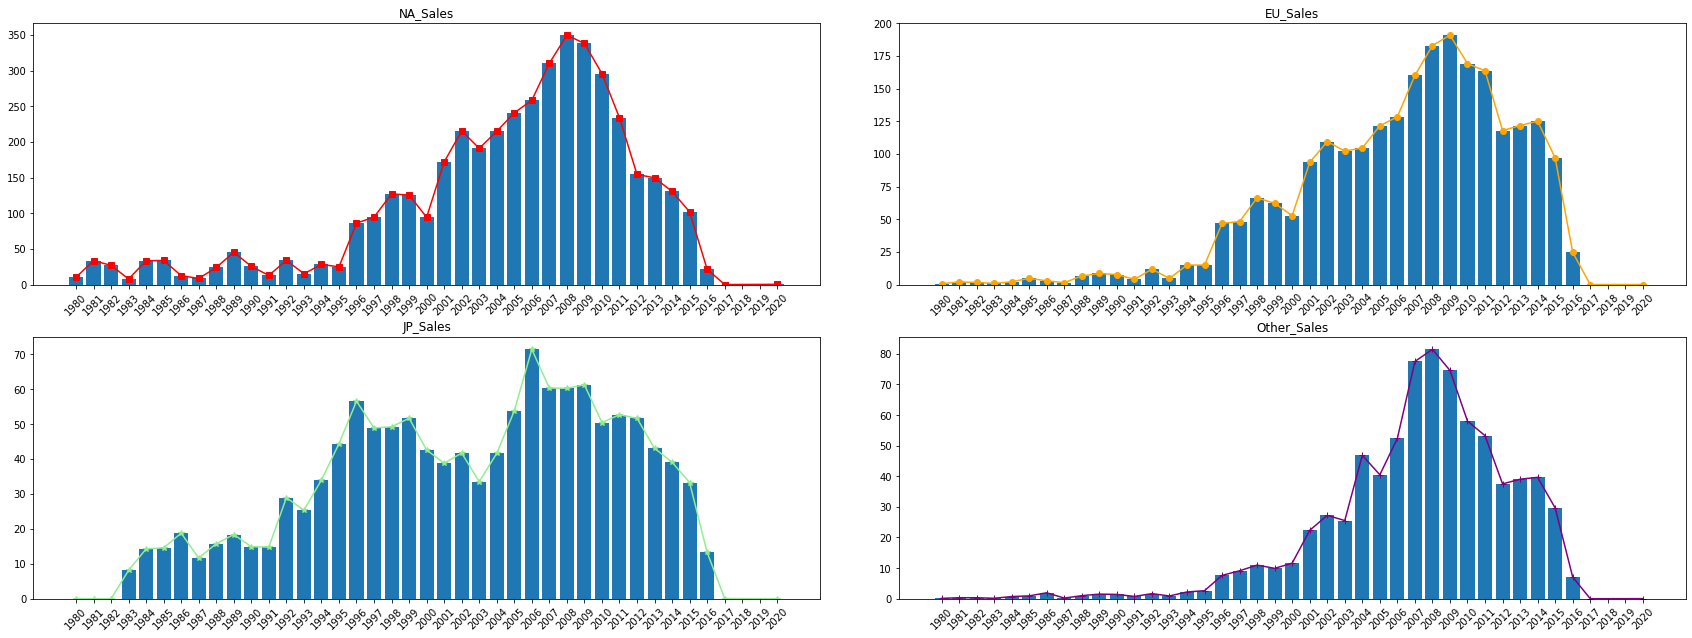

In [ ]:
fig=plt.figure(figsize=(34,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.plot(year_NA.index, year_NA, marker='s', color='red', label='NA_Sales');
ax1.bar(year_NA.index, year_NA);
ax2.plot(year_EU.index, year_EU, marker='o', color='orange', label='EU_Sales');
ax2.bar(year_EU.index, year_EU);
ax3.plot(year_JP.index, year_JP, marker='*', color='lightgreen', label='JP_Sales')
ax3.bar(year_JP.index, year_JP);
ax4.plot(year_Other.index, year_Other, marker='+', color='purple', label='Other_Sales')
ax4.bar(year_Other.index, year_Other);

ax1.set(title='NA_Sales')
ax2.set(title='EU_Sales')
ax3.set(title='JP_Sales')
ax4.set(title='Other_Sales')

ax1.set_xticks(np.arange(1980, 2021, step=1))
ax2.set_xticks(np.arange(1980, 2021, step=1))
ax3.set_xticks(np.arange(1980, 2021, step=1))
ax4.set_xticks(np.arange(1980, 2021, step=1))

xxx=np.arange(1980,2021,1)
ax1.set_xticklabels(xxx,rotation=45)
ax2.set_xticklabels(xxx,rotation=45)
ax3.set_xticklabels(xxx,rotation=45)
ax4.set_xticklabels(xxx,rotation=45)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.8, top=0.9, wspace=0.1, hspace=0.2)
plt.show();

### 3-8) 장르별 출고량 **per 연도**

In [291]:
# 어느 년도에 제작된 어느 장르의 게임이 가장 많이 출고 되었을까

year_genre_sum=df_rev1.pivot_table(index='Genre', columns='Year', values='Total',aggfunc='sum', fill_value = 0)
year_genre_sum2=df_rev1.pivot_table(index='Year', columns='Genre', values='Total',aggfunc='sum', fill_value = 0)

year_genre_sum2

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,0.00,0.77,2.70,0.00,0.00,0.00,0.00,7.07,0.00,0.00,0.00
1981,14.79,0.00,0.00,0.00,6.92,2.25,0.48,0.00,10.02,0.44,0.78,0.00
1982,6.50,0.00,0.00,0.87,5.03,10.04,1.57,0.00,3.81,0.00,1.06,0.00
1983,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.49,0.00,3.20,0.00
1984,1.85,0.00,0.00,1.45,0.69,3.14,5.95,0.00,31.10,0.00,6.17,0.00
1985,3.52,0.00,1.05,0.00,43.17,3.21,0.00,0.00,1.00,0.04,1.96,0.00
1986,13.74,0.00,0.00,0.00,8.34,0.00,1.96,2.52,3.89,0.00,5.58,0.00
1987,1.11,4.38,5.42,0.00,1.74,0.00,0.00,4.65,0.69,0.00,3.71,0.00
1988,1.74,0.00,0.00,0.00,27.73,5.58,2.14,5.88,0.51,0.03,3.60,0.00


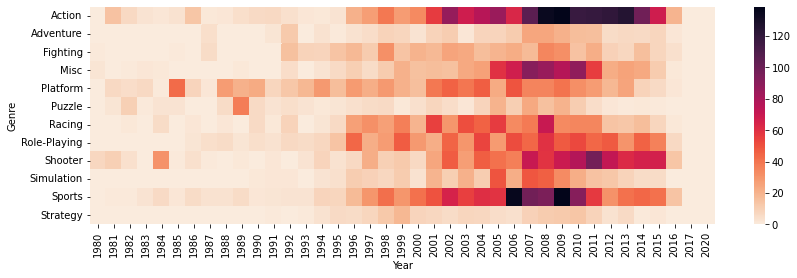

In [159]:
plt.figure(figsize=(14,4))
sns.heatmap(year_genre_sum, cmap="rocket_r");

# annot = True : 데이터를 map 위에 같이 보여주시오
# fmt = '.2f': 소수점 둘째자리인가 / 'd':정수로

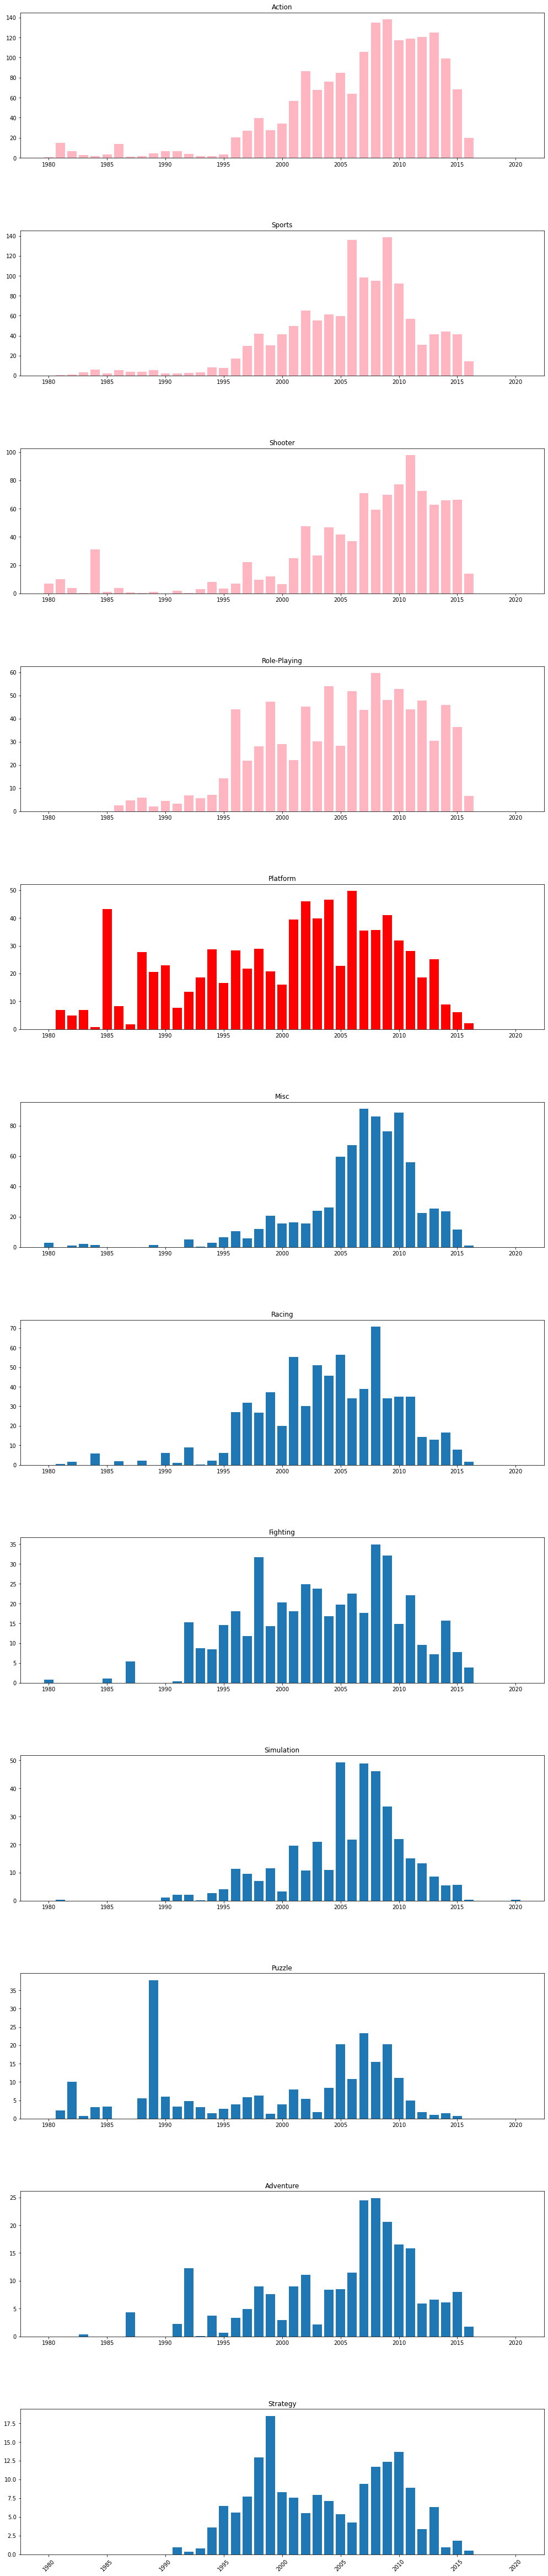

In [327]:
fig=plt.figure(figsize=(16,80))
ax1=fig.add_subplot(12,1,1)
ax3=fig.add_subplot(12,1,2)
ax5=fig.add_subplot(12,1,3)
ax7=fig.add_subplot(12,1,4)
ax9=fig.add_subplot(12,1,5)

ax11=fig.add_subplot(12,1,6)
ax13=fig.add_subplot(12,1,7)
ax15=fig.add_subplot(12,1,8)
ax17=fig.add_subplot(12,1,9)
ax19=fig.add_subplot(12,1,10)
ax21=fig.add_subplot(12,1,11)
ax23=fig.add_subplot(12,1,12)

ax1.bar(year_genre_sum2['Action'].index, year_genre_sum2['Action'], color='lightpink')
ax3.bar(year_genre_sum2['Sports'].index, year_genre_sum2['Sports'], color='lightpink')
ax5.bar(year_genre_sum2['Shooter'].index, year_genre_sum2['Shooter'], color='lightpink')
ax7.bar(year_genre_sum2['Role-Playing'].index, year_genre_sum2['Role-Playing'], color='lightpink')
ax9.bar(year_genre_sum2['Platform'].index, year_genre_sum2['Platform'], color='red')

ax11.bar(year_genre_sum2['Misc'].index, year_genre_sum2['Misc'])
ax13.bar(year_genre_sum2['Racing'].index, year_genre_sum2['Racing'])
ax15.bar(year_genre_sum2['Fighting'].index, year_genre_sum2['Fighting'])
ax17.bar(year_genre_sum2['Simulation'].index, year_genre_sum2['Simulation'])
ax19.bar(year_genre_sum2['Puzzle'].index, year_genre_sum2['Puzzle'])
ax21.bar(year_genre_sum2['Adventure'].index, year_genre_sum2['Adventure'])
ax23.bar(year_genre_sum2['Strategy'].index, year_genre_sum2['Strategy'])

ax1.set(title='Action')
ax3.set(title='Sports')
ax5.set(title='Shooter')
ax7.set(title='Role-Playing')
ax9.set(title='Platform')
ax11.set(title='Misc')
ax13.set(title='Racing')
ax15.set(title='Fighting')
ax17.set(title='Simulation')
ax19.set(title='Puzzle')
ax21.set(title='Adventure')
ax23.set(title='Strategy')

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.95, top=0.9, wspace=0.3, hspace=0.5)
plt.xticks(rotation=45)
plt.show();

In [339]:
years = ["1980_1990", "1991_2000", "2001_2010", "2011_2020"]
year_genre_sum2['Year_Cat']=pd.cut(year_genre_sum2.index, labels=years, bins=4)
year_genre_sum2
year_genre_new=year_genre_sum2.groupby('Year_Cat').sum()
year_genre_new

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_Cat,,,,,,,,,,,,
1980_1990,57.49,4.78,7.24,8.44,144.19,68.74,18.35,19.77,59.77,1.64,33.89,0.00
1991_2000,165.83,46.94,143.47,78.98,200.95,36.78,161.57,207.29,75.08,54.28,185.57,65.20
2001_2010,932.54,137.14,225.36,550.60,388.34,124.61,450.94,435.98,502.42,283.56,851.16,84.82
2011_2020,551.99,44.22,66.25,140.20,88.75,9.84,88.56,211.31,379.04,48.94,229.71,21.83


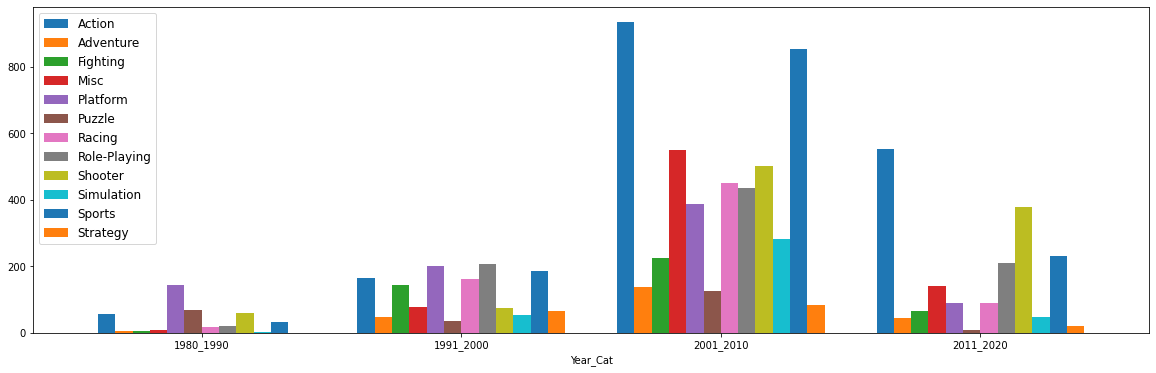

In [361]:
year_genre_new.plot(kind='bar', rot=0, figsize=(20,6), width=0.8)

plt.legend(fontsize=12, loc='upper left')
plt.show();

### 3-9) 플랫폼별 출고량 **per 연도**

In [362]:
# 어느 연도에 제작된 어느 플랫폼에서 지원이 되는 게임이 가장 많이 출고 되었을까

year_plat_sum=df_rev1.pivot_table(index='Platform', columns='Year', values='Total',aggfunc='sum', fill_value = 0)
year_plat_sum2=df_rev1.pivot_table(index='Year', columns='Platform', values='Total',aggfunc='sum', fill_value = 0)
year_plat_sum2

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,10.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,53.44,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,0.00,45.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


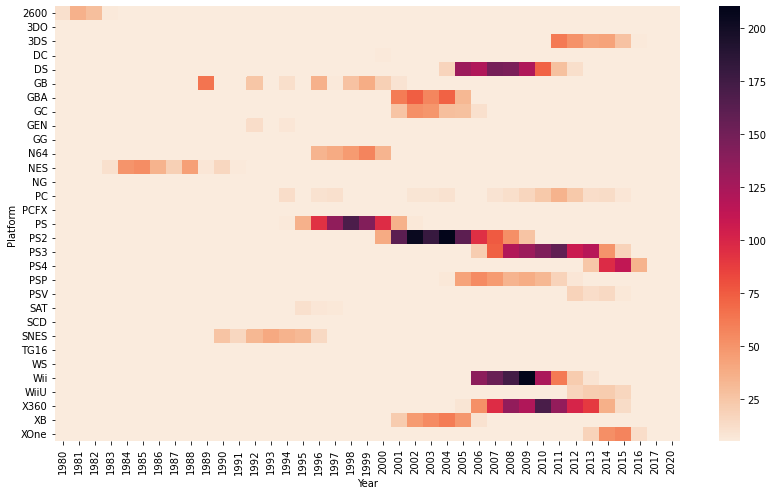

In [264]:
plt.figure(figsize=(14,8))
sns.heatmap(year_plat_sum, vmin=5, cmap="rocket_r");

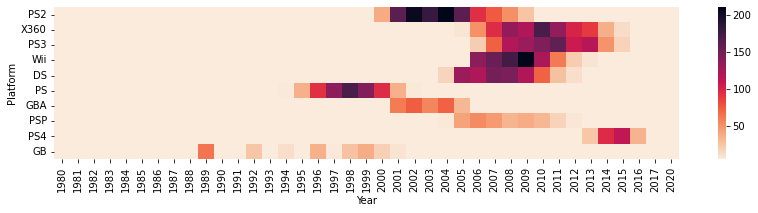

In [242]:
plt.figure(figsize=(14,2.8))
sns.heatmap(year_plat_sum.loc[['PS2','X360','PS3','Wii','DS','PS','GBA','PSP','PS4','GB']], vmin=5, cmap="rocket_r");

In [366]:
year_plat_sum10=year_plat_sum.loc[['PS2','X360','PS3','Wii','DS','PS','GBA','PSP','PS4','GB']]
year_plat_sum10=year_plat_sum10.transpose()
year_plat_sum10

Platform,PS2,X360,PS3,Wii,DS,PS,GBA,PSP,PS4,GB
Year,,,,,,,,,,
1980,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00
1986,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43


In [368]:
years = ["1980_1990", "1991_2000", "2001_2010", "2011_2020"]
year_plat_sum10['Year_Cat']=pd.cut(year_plat_sum10.index, labels=years, bins=4)
#year_plat_sum10

year_plat_new=year_plat_sum10.groupby('Year_Cat').sum()
year_plat_new

Platform,PS2,X360,PS3,Wii,DS,PS,GBA,PSP,PS4,GB
Year_Cat,,,,,,,,,,
1980_1990,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,71.29
1991_2000,39.17,0.00,0.00,0.00,0.00,679.17,0.07,0.00,0.00,173.70
2001_2010,1172.70,582.86,489.53,799.43,758.66,44.31,304.47,258.10,0.00,9.24
2011_2020,0.45,374.85,455.72,99.87,41.34,0.00,0.00,29.06,269.15,0.00


In [370]:
years = ["1980_1990", "1991_2000", "2001_2010", "2011_2020"]
year_plat_sum2['Year_Cat']=pd.cut(year_plat_sum2.index, labels=years, bins=4)
year_plat_sum2

year_plat_new2=year_plat_sum2.groupby('Year_Cat').sum()
year_plat_new2

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year_Cat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980_1990,85.98,0.0,0.00,0.00,0.02,71.29,0.00,0.00,2.60,0.00,0.00,238.19,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1991_2000,0.00,0.1,0.00,14.53,0.00,173.70,0.07,0.00,25.75,0.04,212.34,11.81,1.44,54.61,0.03,679.17,39.17,0.00,0.00,0.00,0.00,32.34,1.86,172.69,0.16,1.14,0.00,0.00,0.00,0.99,0.00
2001_2010,0.00,0.0,0.00,1.42,758.66,9.24,304.47,195.58,0.00,0.00,3.33,0.00,0.00,102.32,0.00,44.31,1172.70,489.53,0.00,258.10,0.00,0.00,0.00,0.00,0.00,0.28,799.43,0.00,582.86,245.24,0.00
2011_2020,0.00,0.0,231.22,0.00,41.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,95.26,0.00,0.00,0.45,455.72,269.15,29.06,60.85,0.00,0.00,0.00,0.00,0.00,99.87,81.79,374.85,0.00,141.08


### 3-10) 게임이름별 출고량 **per 연도**

In [272]:
# 어느 년도에 제작된 어느 게임이 가장 많이 출고 되었을까

year_genre_sum=df_rev1.pivot_table(index='Name', columns='Year', values='Total',aggfunc='sum', fill_value = 0)
year_genre_sum2=df_rev1.pivot_table(index='Year', columns='Name', values='Total',aggfunc='sum', fill_value = 0)

year_genre_sum2

Name,'98 Koshien,.hack//G.U. Vol.1//Rebirth,.hack//G.U. Vol.2//Reminisce,.hack//G.U. Vol.2//Reminisce (jp sales),.hack//G.U. Vol.3//Redemption,.hack//Infection Part 1,.hack//Link,.hack//Mutation Part 2,.hack//Outbreak Part 3,.hack//Quarantine Part 4: The Final Chapter,.hack: Sekai no Mukou ni + Versus,007 Racing,007: Quantum of Solace,007: The World is not Enough,007: Tomorrow Never Dies,1 vs. 100,1/2 Summer +,10 Minute Solution,100 All-Time Favorites,100 Classic Books,100 Classic Games,1000 Cooking Recipes from ELLE à table,1001 Touch Games,101-in-1 Explosive Megamix,101-in-1 Party Megamix Wii,101-in-1 Sports Megamix,101-in-1 Sports Party Megamix,1080°: TenEighty Snowboarding,11eyes: CrossOver,12-Sai. Honto no Kimochi,12-Sai. Koisuru Diary,12Riven: The Psi-Climinal of Integral,15 Days,1701 A.D.,18 Wheeler: American Pro Trucker,18 Wheels of Steel: Extreme Trucker,18 Wheels of Steel: Extreme Trucker 2,187: Ride or Die,1942,2 Games in 1 Double Pack: Hot Wheels Velocity X / Hot Wheels World Race,...,Zoo Tycoon 2,Zoo Tycoon 2 DS,Zoo Tycoon 2: Ultimate Collection,Zoo Tycoon DS,Zoo Tycoon: Complete Collection,Zoo Vet: Endangered Animals,ZooCube,Zoobles! Spring to Life!,Zoop,Zubo,Zumba Fitness,Zumba Fitness 2,Zumba Fitness Core,Zumba Fitness Rush,Zumba Fitness: World Party,Zwei!!,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,[Prototype 2],[Prototype],de Blob,de Blob 2,echochrome,ef - a fairy tale of the two.,everGirl,futureU: The Prep Game for SAT,htoL#NiQ: The Firefly Diary,iCarly,iCarly 2: iJoin The Click!,inFAMOUS,inFAMOUS 2,inFAMOUS: Second Son,nail'd,pro evolution soccer 2011,th!nk Logic Trainer,thinkSMART,thinkSMART FAMILY!,thinkSMART: Chess for Kids,uDraw Studio,uDraw Studio: Instant Artist,¡Shin Chan Flipa en colores!
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1981,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1982,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1983,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1984,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1985,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [286]:
years = ["1980_1990", "1991_2000", "2001_2010", "2011_2020"]
year_genre_sum2['Year_Cat']=pd.cut(year_genre_sum2.index, labels=years, bins=4)
year_genre_sum2[year_genre_sum2['Year_Cat']=="1980_1990"]
year_genre_new=year_genre_sum2.groupby('Year_Cat').sum()
year_genre_new=year_genre_new.transpose()

year_genre_new_8090=year_genre_new['1980_1990']
year_genre_new_8090=pd.DataFrame(year_genre_new_8090)
year_genre_new_8090=year_genre_new_8090.reset_index().sort_values(by='1980_1990', ascending=False)
year_genre_new_8090.head(10)

,Name,1980_1990
9134,Super Mario Bros.,40.24
9514,Tetris,35.84
2524,Duck Hunt,28.31
9148,Super Mario World,20.62
9141,Super Mario Land,18.14
9136,Super Mario Bros. 3,17.28
2336,Dr. Mario,10.18
6879,Pac-Man,9.03
9135,Super Mario Bros. 2,7.46
9748,The Legend of Zelda,6.50


In [287]:
year_genre_new_9100=year_genre_new['1991_2000']
year_genre_new_9100=pd.DataFrame(year_genre_new_9100)
year_genre_new_9100=year_genre_new_9100.reset_index().sort_values(by='1991_2000', ascending=False)
year_genre_new_9100.head(10)

,Name,1991_2000
7194,Pokemon Red/Pokemon Blue,31.38
7181,Pokemon Gold/Pokemon Silver,23.09
7216,Pokémon Yellow: Special Pikachu Edition,14.64
9130,Super Mario 64,11.90
2267,Donkey Kong Country,11.49
9142,Super Mario Land 2: 6 Golden Coins,11.18
3601,Gran Turismo,10.95
9132,Super Mario All-Stars,10.55
5454,Mario Kart 64,9.87
3084,Final Fantasy VII,9.72


In [288]:
year_genre_new_0110=year_genre_new['2001_2010']
year_genre_new_0110=pd.DataFrame(year_genre_new_0110)
year_genre_new_0110=year_genre_new_0110.reset_index().sort_values(by='2001_2010', ascending=False)
year_genre_new_0110.head(10)

,Name,2001_2010
10764,Wii Sports,82.74
5458,Mario Kart Wii,35.83
10766,Wii Sports Resort,33.00
6587,New Super Mario Bros.,30.01
1191,Call of Duty: Black Ops,29.41
10762,Wii Play,29.01
6590,New Super Mario Bros. Wii,28.61
1196,Call of Duty: Modern Warfare 2,25.10
6653,Nintendogs,24.75
3627,Grand Theft Auto: San Andreas,23.86


In [289]:
year_genre_new_1120=year_genre_new['2011_2020']
year_genre_new_1120=pd.DataFrame(year_genre_new_1120)
year_genre_new_1120=year_genre_new_1120.reset_index().sort_values(by='2011_2020', ascending=False)
year_genre_new_1120.head(10)

,Name,2011_2020
3623,Grand Theft Auto V,55.92
1197,Call of Duty: Modern Warfare 3,30.84
1193,Call of Duty: Black Ops II,29.73
1195,Call of Duty: Ghosts,27.37
1192,Call of Duty: Black Ops 3,25.30
5810,Minecraft,23.75
1190,Call of Duty: Advanced Warfare,21.89
2855,FIFA 15,19.02
699,Battlefield 3,17.37
2854,FIFA 14,17.16
